In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in data
df = pd.read_csv('/Users/charliefountain/Desktop/bsc-phase-three-project/data/pgaTourData.csv')

In [3]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [5]:
df.shape

(2312, 18)

In [6]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1674 non-null   object 
 1   Rounds              1674 non-null   int64  
 2   Fairway Percentage  1674 non-null   float64
 3   Year                1674 non-null   int64  
 4   Avg Distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   Average Putts       1674 non-null   float64
 7   Average Scrambling  1674 non-null   float64
 8   Average Score       1674 non-null   float64
 9   Points              1674 non-null   int64  
 10  Wins                1674 non-null   int64  
 11  Top 10              1674 non-null   int64  
 12  Average SG Putts    1674 non-null   float64
 13  Average SG Total    1674 non-null   float64
 14  SG:OTT              1674 non-null   float64
 15  SG:APR              1674 non-null   float64
 16  SG:ARG

In [8]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [9]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

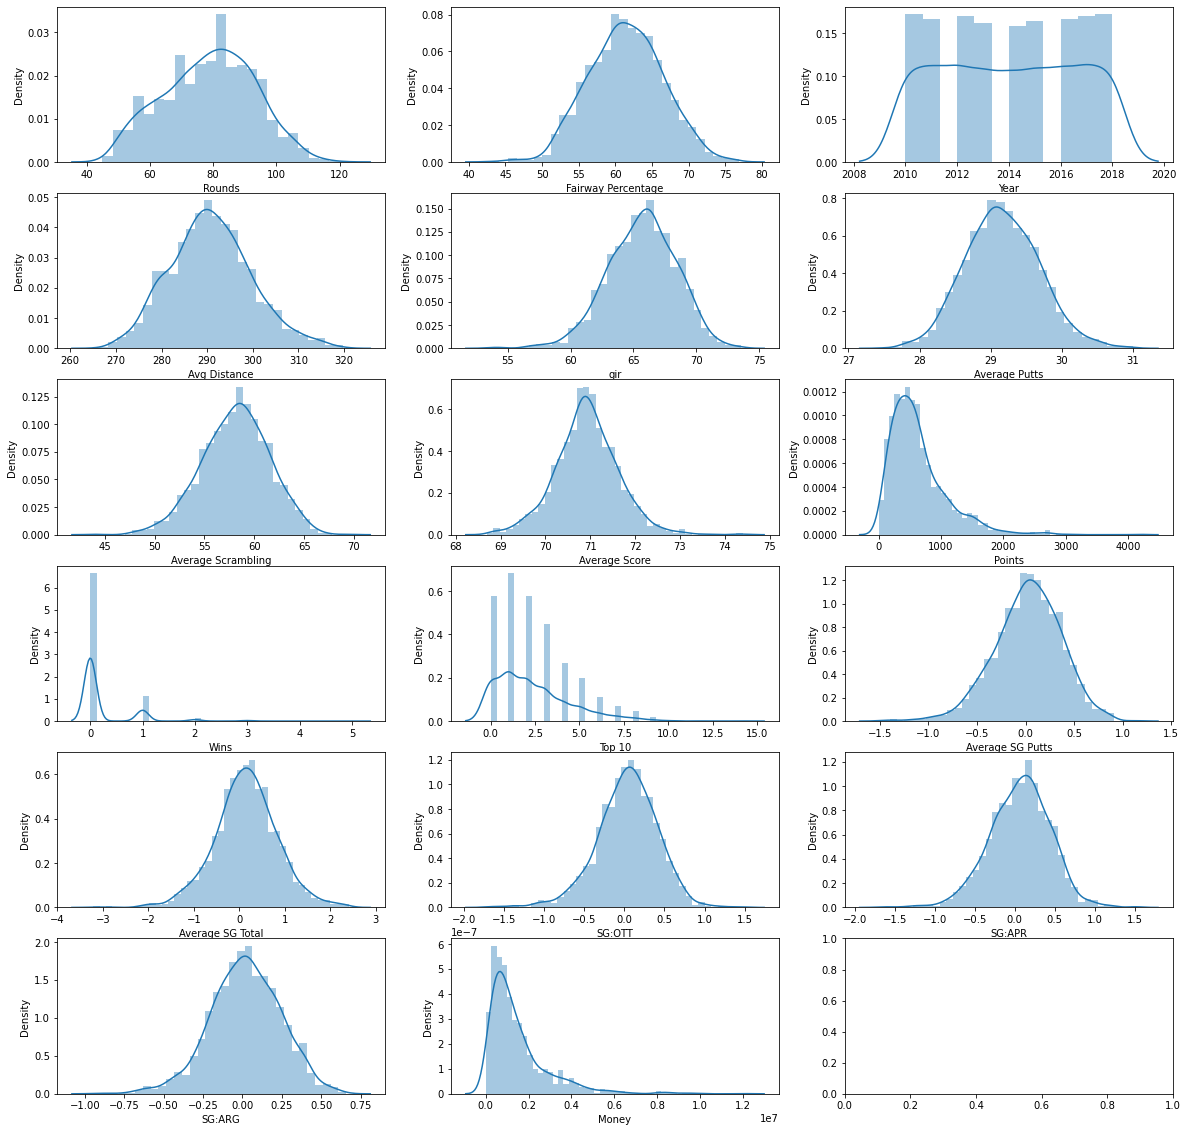

In [10]:
#Exploratory Data Analysis / looking at distrubition
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [11]:
#Number of wins per player
win = df.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

# Converting win into ints
win = win.astype(int)

print(win)

Wins    0   1  2  3  4  5
Year                     
2010  166  21  5  0  0  0
2011  156  25  5  0  0  0
2012  159  26  4  1  0  0
2013  152  24  3  0  0  1
2014  142  29  3  2  0  0
2015  150  29  2  1  1  0
2016  152  28  4  1  0  0
2017  156  30  0  3  1  0
2018  158  26  5  3  0  0


In [12]:
# Who made the most money
money_ranking = df[['Year','Player Name','Money']].copy()
money_ranking.sort_values(by='Money', inplace=True, ascending=False)
print(money_ranking.head())

     Year     Player Name       Money
647  2015   Jordan Spieth  12030465.0
361  2017   Justin Thomas   9921560.0
303  2017   Jordan Spieth   9433033.0
729  2015       Jason Day   9403330.0
520  2016  Dustin Johnson   9365185.0


In [13]:
#Who made the most each year
money_rank = money_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2018)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


In [14]:
#Creating a new column that has a 1 if greater than 50000
df['Money'] = pd.to_numeric(df.Money, errors='coerce')
df['new_money'] = df['Money'] > 500000
df["new_money"] = df["new_money"].astype(int)

In [15]:
df.head( )

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,1
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,1
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,1
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,1


<AxesSubplot:>

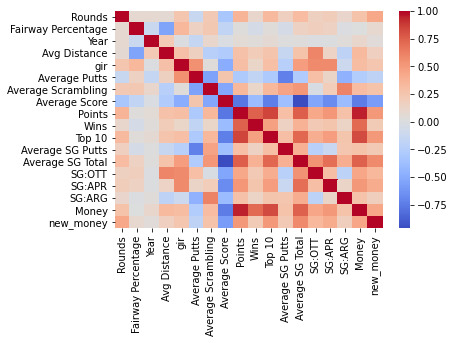

In [16]:
#creating a heatmap to see corr
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')

In [17]:
#looking at the corr
df.corr()['Money']

Rounds                0.278091
Fairway Percentage    0.016237
Year                  0.108244
Avg Distance          0.329295
gir                   0.313770
Average Putts        -0.257832
Average Scrambling    0.317777
Average Score        -0.746499
Points                0.949286
Wins                  0.721665
Top 10                0.827215
Average SG Putts      0.278895
Average SG Total      0.747042
SG:OTT                0.441912
SG:APR                0.510740
SG:ARG                0.278901
Money                 1.000000
new_money             0.445615
Name: Money, dtype: float64

In [18]:
# Percentage of people who did not place in the top 10 each year
top10 = df.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)
players = top10.apply(lambda x: np.sum(x), axis=1)

no_top10 = top10[0]/players * 100
print(no_top10)

Year
2010    17.187500
2011    25.268817
2012    23.157895
2013    18.888889
2014    16.477273
2015    18.579235
2016    20.000000
2017    15.789474
2018    17.187500
dtype: float64


In [19]:
# Defining the players that had a win or more in each year 
champion = df.loc[df['Wins'] >= 1, :]
champion =champion.sort_values(by="Wins", ascending=False)
champion.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money
997,Tiger Woods,61,62.50,2013,293.2,67.59,28.85,60.00,68.944,3059,5,7,0.426,2.064,-0.142,1.533,0.247,8553439.0,1
647,Jordan Spieth,91,62.91,2015,291.8,67.87,27.82,65.03,68.938,4169,4,14,0.571,2.154,0.494,0.618,0.471,12030465.0,1
361,Justin Thomas,86,54.09,2017,309.3,67.33,28.29,60.54,69.359,2689,4,9,0.332,1.724,0.452,0.738,0.289,9921560.0,1
141,Bubba Watson,90,58.27,2018,313.1,68.21,29.33,56.64,70.384,1879,3,5,0.001,0.555,0.780,0.005,-0.231,5793748.0,1
137,Justin Thomas,91,58.41,2018,311.8,68.77,28.33,62.47,69.118,2634,3,8,0.272,1.835,0.408,0.844,0.311,8694821.0,1


In [20]:
#new column that shows me who earned points
df['new_points'] = df['Points'] > 0
df['new_points'] = df['new_points'].astype(int)
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,1,1
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,1,1
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,1,1
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,1,1


In [21]:
#If they have any wins they are 1 and no wins is zero
df['new_wins'] = df['Wins'] > 0
df['new_wins'] = df['new_wins'].astype(int)
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,...,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points,new_wins
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,...,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,1,1,0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,...,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1,1,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,...,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,1,1,0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,...,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,1,1,0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,...,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,1,1,0


In [22]:
#creating binned_points which split players up by points
df['binned_points'] = pd.qcut(df['Points'], q=3)
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,...,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points,new_wins,binned_points
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,...,-0.207,1.153,0.427,0.960,-0.027,2680487.0,1,1,0,"(682.333, 4169.0]"
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,...,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1,1,1,"(682.333, 4169.0]"
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,...,0.192,0.674,0.183,0.437,-0.137,2700018.0,1,1,0,"(682.333, 4169.0]"
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,...,-0.271,0.941,0.406,0.532,0.273,1986608.0,1,1,0,"(682.333, 4169.0]"
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,...,0.164,0.062,-0.227,0.099,0.026,1089763.0,1,1,0,"(389.333, 682.333]"


In [23]:
#viewing the number of players in each bin
df['binned_points'].value_counts()

(682.333, 4169.0]     558
(389.333, 682.333]    558
(2.999, 389.333]      558
Name: binned_points, dtype: int64

In [24]:
#making it a string 
df['binned_points'] = df['binned_points'].astype('string')

In [25]:
df.dtypes

Player Name            object
Rounds                  int64
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                  int64
Wins                    int64
Top 10                  int64
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                 float64
new_money               int64
new_points              int64
new_wins                int64
binned_points          string
dtype: object

In [26]:
df = df.replace(['(389.333, 682.333]', '(2.999, 389.333]', '(682.333, 4169.0]'], ['0', '1', '2'])

In [27]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#checking correlation
df.corr()['Points']

Rounds                0.364636
Fairway Percentage    0.032302
Year                  0.057549
Avg Distance          0.281107
gir                   0.303183
Average Putts        -0.282488
Average Scrambling    0.344421
Average Score        -0.763993
Points                1.000000
Wins                  0.750110
Top 10                0.848195
Average SG Putts      0.297614
Average SG Total      0.761594
SG:OTT                0.437439
SG:APR                0.521278
SG:ARG                0.284049
Money                 0.949286
new_money             0.511896
new_points                 NaN
new_wins              0.655472
Name: Points, dtype: float64

In [29]:
#creaing my x and y for train test split
y = df['binned_points']

X = df.drop(['new_money',"Money", "Player Name","Wins",'Top 10',"Year",
            'new_points','new_wins', 'binned_points','Points'], axis=1)

In [30]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.30, random_state=2021)

In [31]:
#2nd tran test split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.30, random_state=2021)

In [32]:
#Preprocessing checking for missing data
X_train.isna().sum()

Rounds                0
Fairway Percentage    0
Avg Distance          0
gir                   0
Average Putts         0
Average Scrambling    0
Average Score         0
Average SG Putts      0
Average SG Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
dtype: int64

In [33]:
#Checking for missing data
X_val.isna().sum()

Rounds                0
Fairway Percentage    0
Avg Distance          0
gir                   0
Average Putts         0
Average Scrambling    0
Average Score         0
Average SG Putts      0
Average SG Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
dtype: int64

In [34]:
#Scaling my data
num_cols = list(X.select_dtypes('number').columns)
num_cols

['Rounds',
 'Fairway Percentage',
 'Avg Distance',
 'gir',
 'Average Putts',
 'Average Scrambling',
 'Average Score',
 'Average SG Putts',
 'Average SG Total',
 'SG:OTT',
 'SG:APR',
 'SG:ARG']

In [35]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [36]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [37]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [38]:
X_train_scaled

,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
0,0.704438,1.585049,-1.455500,-0.199657,-0.245693,-0.281693,-0.752878,0.465113,0.581419,-0.606428,0.643723,1.001119
1,-0.079344,-0.158855,-0.628453,-1.180967,-1.098248,0.852137,-0.754394,0.143201,0.312152,-1.322973,0.907603,1.481678
2,-2.003173,0.226240,-0.740216,-0.312326,1.955088,-2.862241,2.091318,-3.716740,-2.365301,-0.659505,0.385285,-0.971462
3,1.630726,0.796900,-0.516690,-0.137871,-1.237036,2.143960,-1.360509,0.067988,1.199059,-0.213654,1.198686,1.843242
4,0.846944,-0.837262,1.562105,-0.116064,-0.483615,0.994640,-0.030086,0.347781,0.465802,1.293745,-1.521720,1.202496
...,...,...,...,...,...,...,...,...,...,...,...,...
814,-0.221850,0.645256,-0.192577,0.919764,0.329286,-0.575993,-1.189281,0.332738,1.520049,0.951395,1.576823,-0.248335
815,0.490679,0.036686,-0.091990,0.643543,1.221494,-0.393217,0.369951,-0.016251,-0.150317,0.030502,-0.017336,-0.445135
816,-1.005632,0.786923,0.880350,1.275943,0.230151,-0.275497,-0.296776,-0.115533,0.198056,-0.046461,0.722615,-0.362754
817,0.419427,0.499598,-0.404927,-0.268712,-1.256863,0.997738,-1.601440,1.689584,1.425729,0.218927,0.349919,0.758551


In [39]:
y_train

1507    0
1213    0
1173    1
226     2
517     2
       ..
1562    2
1193    1
614     0
1360    2
380     1
Name: binned_points, Length: 819, dtype: object

In [40]:
#modeling function
# Instantiate Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [41]:
rf = RandomForestClassifier(random_state=2021)
rf = modeling_function(rf, X_train, y_train, X_val, y_val)

Training accuracy:  1.0
Validation accuracy:  0.6619318181818182


In [42]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [5, 10, 15, 20, 25],
                'min_samples_leaf': [5, 7, 10, 12],
             'n_jobs': [-1],
             'criterion': ['gini', 'entropy']}

In [43]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [44]:
#fitting training data
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [5, 7, 10, 12],
                         'n_estimators': [50, 75, 100], 'n_jobs': [-1]},
             scoring='accuracy')

In [45]:
#finding my best params
best_model = rf_gs.best_estimator_

In [46]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 7,
 'n_estimators': 100,
 'n_jobs': -1}

In [47]:
#calling modeling function
modeling_function(best_model, X_train, y_train, X_val, y_val)

Training accuracy:  0.8363858363858364
Validation accuracy:  0.6534090909090909


RandomForestClassifier(max_depth=15, min_samples_leaf=7, n_jobs=-1,
                       random_state=2021)

In [48]:
# Create Param Grid 
param_grid2 = {'n_estimators': [90, 100, 110],
                'max_depth': [13, 14, 15, 16, 17],
                'min_samples_leaf': [7, 8, 9, 10],
             'n_jobs': [-1],
             'criterion': ['gini']}

In [49]:
# Create GridSearchCV
rf2_gs = GridSearchCV(estimator=rf, param_grid=param_grid2, scoring='accuracy')

In [50]:
rf2_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini'],
                         'max_depth': [13, 14, 15, 16, 17],
                         'min_samples_leaf': [7, 8, 9, 10],
                         'n_estimators': [90, 100, 110], 'n_jobs': [-1]},
             scoring='accuracy')

In [51]:
bestest_model = rf2_gs.best_estimator_

In [52]:
rf2_gs.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 8,
 'n_estimators': 90,
 'n_jobs': -1}

In [53]:
#calling modeling function
modeling_function(bestest_model, X_train, y_train, X_val, y_val)

Training accuracy:  0.8205128205128205
Validation accuracy:  0.6732954545454546


RandomForestClassifier(max_depth=13, min_samples_leaf=8, n_estimators=90,
                       n_jobs=-1, random_state=2021)

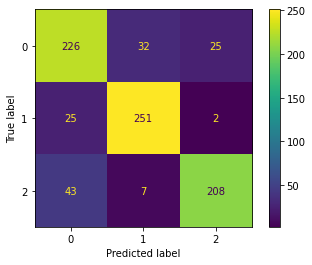

In [54]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model, X_train, y_train)

In [55]:
test_preds = rf_gs.predict(X_test)

In [56]:
accuracy_score(y_test, test_preds)

0.7216699801192843

Text(0, 0.5, 'Points Awarded')

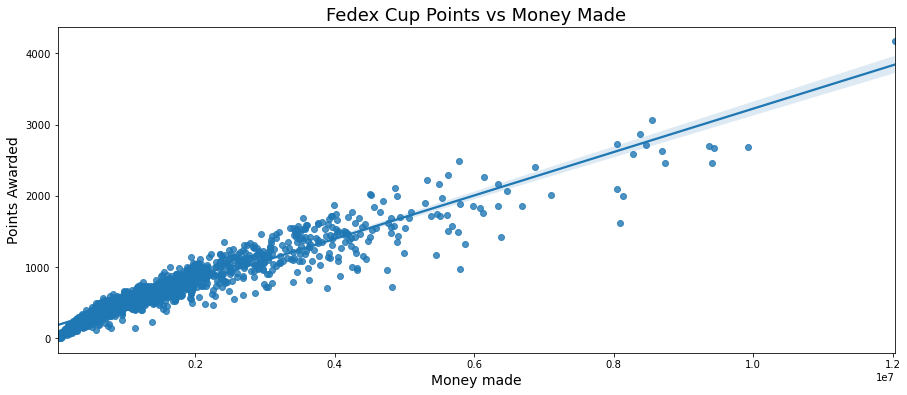

In [110]:
## Creates scatter plot of Fedex Points vs Tournament earnings
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Fedex Cup Points vs Money Made", fontsize=18)
sns.regplot(data=df, x='Money', y='Points')
ax.set_xlabel("Money made", fontsize=14)
ax.set_ylabel("Points Awarded", fontsize=14)

In [58]:
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('std_scaler', StandardScaler()),
        ('rf_clf', DecisionTreeClassifier()),
])


# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X_test)

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('rf_clf', DecisionTreeClassifier())])

In [60]:
pipeline.score(X_train, y_train)

1.0

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'scaler__with_mean': [True, False],
    'clf__n_neighbors': [1, 3, 5],
    'clf__metric': ['minkowski', 'manhattan'],
    'clf__weights': ['uniform', 'distance']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train.select_dtypes('float64'), y_train)
y_pred = cv.predict(X_test.select_dtypes('float64'))

In [62]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('rf_clf', DecisionTreeClassifier())])

In [63]:
pipeline.score(X_train, y_train)

1.0

In [64]:
# Who earned the most points
points_ranking = df[['Year','Player Name','Points']].copy()
points_ranking.sort_values(by='Points', inplace=True, ascending=False)
print(points_ranking.head())

     Year       Player Name  Points
647  2015     Jordan Spieth    4169
997  2013       Tiger Woods    3059
323  2017  Hideki Matsuyama    2869
563  2016         Jason Day    2735
124  2018    Dustin Johnson    2717


In [65]:
# Who earned the most points each year
points_rank = points_ranking.groupby('Year')['Points'].max()
points_rank = pd.DataFrame(points_rank)
print(points_rank.iloc[0,0])

indexs = np.arange(2010, 2019)
names = []
for i in range(points_rank.shape[0]):
    temp = df.loc[df['Points'] == points_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

points_rank['Player Name'] = names
print(points_rank)

1846
      Points       Player Name
Year                          
2010    1846         Ernie Els
2011    1906       Nick Watney
2012    2269       Tiger Woods
2013    3059       Tiger Woods
2014    2582      Rory McIlroy
2015    4169     Jordan Spieth
2016    2735         Jason Day
2017    2869  Hideki Matsuyama
2018    2717    Dustin Johnson


In [66]:
players_points = df.iloc[:,[0,3,24,9]]
players_points

IndexError: positional indexers are out-of-bounds

In [67]:
df['Player Name'].nunique()

438

In [68]:
df[df['Player Name'] == df['Player Name'].unique()[0]].select_dtypes('number').diff()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points,new_wins
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,3.0,-5.28,-3.0,4.9,0.01,-0.06,1.57,-0.263,84.0,0.0,-1.0,0.643,1.057,0.021,0.284,0.109,2074583.0,0.0,0.0,0.0
765,-7.0,-1.13,-1.0,-3.2,-4.49,0.02,-10.41,0.812,-232.0,0.0,-1.0,-0.606,-1.218,0.202,-0.669,-0.146,-2860835.0,0.0,0.0,0.0
935,9.0,1.31,-1.0,-2.3,2.93,0.02,5.45,-0.918,706.0,0.0,3.0,0.174,0.626,0.060,0.201,0.192,4493995.0,0.0,0.0,0.0
1161,-14.0,-5.96,-1.0,-1.4,-6.59,-0.61,1.76,0.991,-1032.0,0.0,-5.0,0.101,-0.703,-0.367,-0.479,0.041,-5597123.0,0.0,0.0,0.0


In [69]:
player_progression = pd.DataFrame()

for player in df['Player Name'].unique():
    frame = df[df['Player Name'] == player]
    frame = frame.sort_values("Year")
    year = frame.Year
    frame = frame.select_dtypes('number').diff()
    frame.Year = year
    frame['player_name'] = player
    player_progression = player_progression.append(frame)

In [70]:
player_progression = player_progression.dropna()

In [71]:
player_progression

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,...,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points,new_wins,player_name
935,14.0,5.96,2013,1.4,6.59,0.61,-1.76,-0.991,1032.0,0.0,...,-0.101,0.703,0.367,0.479,-0.041,5597123.0,0.0,0.0,0.0,Henrik Stenson
765,-9.0,-1.31,2014,2.3,-2.93,-0.02,-5.45,0.918,-706.0,0.0,...,-0.174,-0.626,-0.060,-0.201,-0.192,-4493995.0,0.0,0.0,0.0,Henrik Stenson
579,7.0,1.13,2015,3.2,4.49,-0.02,10.41,-0.812,232.0,0.0,...,0.606,1.218,-0.202,0.669,0.146,2860835.0,0.0,0.0,0.0,Henrik Stenson
0,-3.0,5.28,2018,-4.9,-0.01,0.06,-1.57,0.263,-84.0,0.0,...,-0.643,-1.057,-0.021,-0.284,-0.109,-2074583.0,0.0,0.0,0.0,Henrik Stenson
1,46.0,0.85,2018,4.7,-1.74,-0.57,1.82,-0.207,784.0,1.0,...,-0.029,0.230,-0.032,0.092,0.199,2042197.0,1.0,0.0,1.0,Ryan Armour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,16.0,-6.33,2011,-6.4,-5.68,-0.39,3.94,0.811,-89.0,0.0,...,-0.008,-0.581,-0.545,-0.391,0.359,-376380.0,-1.0,0.0,0.0,Paul Stankowski
1430,29.0,-4.54,2011,-10.1,-3.39,0.11,-0.54,0.782,-10.0,0.0,...,-0.212,-0.847,-0.441,-0.064,-0.133,-105301.0,0.0,0.0,0.0,Jarrod Lyle
1457,-24.0,-2.70,2011,5.7,-3.47,-0.60,0.29,-0.081,-90.0,0.0,...,0.071,-0.057,-0.266,-0.046,0.176,85069.0,0.0,0.0,0.0,Joe Ogilvie
1464,7.0,-6.96,2011,2.9,-1.60,0.52,-2.63,1.176,-435.0,0.0,...,-0.097,-1.062,-0.504,-0.501,0.040,-819050.0,-1.0,0.0,0.0,Shaun Micheel


In [72]:
df1 = player_progression.groupby('player_name')['Points'].mean().sort_values(ascending=False)
df1

player_name
Martin Kaymer       1051.0
Andrew Landry        899.0
Andrew Putnam        834.0
Patrick Cantlay      810.0
Ryan Armour          784.0
                     ...  
Steve Elkington     -464.0
Tiger Woods         -553.5
Mackenzie Hughes    -747.0
Wesley Bryan        -827.0
Smylie Kaufman      -865.0
Name: Points, Length: 316, dtype: float64

In [73]:
#player_progression['improvment']= player_progression['Points'].apply(lambda x: 1 if x >= 0 or x <= 0 else 0)

In [74]:
player_progression['positive'] = player_progression['Points'] > 0

In [75]:
player_progression['improvement'] = player_progression['positive'].apply(lambda x: 1 if x else 0)

In [76]:
player_progression

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,...,SG:OTT,SG:APR,SG:ARG,Money,new_money,new_points,new_wins,player_name,positive,improvement
935,14.0,5.96,2013,1.4,6.59,0.61,-1.76,-0.991,1032.0,0.0,...,0.367,0.479,-0.041,5597123.0,0.0,0.0,0.0,Henrik Stenson,True,1
765,-9.0,-1.31,2014,2.3,-2.93,-0.02,-5.45,0.918,-706.0,0.0,...,-0.060,-0.201,-0.192,-4493995.0,0.0,0.0,0.0,Henrik Stenson,False,0
579,7.0,1.13,2015,3.2,4.49,-0.02,10.41,-0.812,232.0,0.0,...,-0.202,0.669,0.146,2860835.0,0.0,0.0,0.0,Henrik Stenson,True,1
0,-3.0,5.28,2018,-4.9,-0.01,0.06,-1.57,0.263,-84.0,0.0,...,-0.021,-0.284,-0.109,-2074583.0,0.0,0.0,0.0,Henrik Stenson,False,0
1,46.0,0.85,2018,4.7,-1.74,-0.57,1.82,-0.207,784.0,1.0,...,-0.032,0.092,0.199,2042197.0,1.0,0.0,1.0,Ryan Armour,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,16.0,-6.33,2011,-6.4,-5.68,-0.39,3.94,0.811,-89.0,0.0,...,-0.545,-0.391,0.359,-376380.0,-1.0,0.0,0.0,Paul Stankowski,False,0
1430,29.0,-4.54,2011,-10.1,-3.39,0.11,-0.54,0.782,-10.0,0.0,...,-0.441,-0.064,-0.133,-105301.0,0.0,0.0,0.0,Jarrod Lyle,False,0
1457,-24.0,-2.70,2011,5.7,-3.47,-0.60,0.29,-0.081,-90.0,0.0,...,-0.266,-0.046,0.176,85069.0,0.0,0.0,0.0,Joe Ogilvie,False,0
1464,7.0,-6.96,2011,2.9,-1.60,0.52,-2.63,1.176,-435.0,0.0,...,-0.504,-0.501,0.040,-819050.0,-1.0,0.0,0.0,Shaun Micheel,False,0


In [77]:
# Target
y1 = player_progression['improvement']
# Features
X1 = player_progression.drop(['new_money',"Money","Wins",'Top 10',"Year",
                              'Points','player_name', 'new_points',
                              'new_wins','improvement','positive'], axis=1)

In [78]:
# Initial Train-Test Split
X_tr1, X_test1, y_tr1, y_test1 = train_test_split(X1, y1, test_size=.15, random_state=2021)

In [79]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_tr1, y_tr1, test_size=.15, random_state=2021)

In [80]:
# Instantiate a SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [81]:
# Fit on training data
imputer.fit(X_train1)

SimpleImputer()

In [82]:
# Transform training and validation data
X_train_imputed1 = pd.DataFrame(imputer.transform(X_train1), columns=X1.columns)
X_val_imputed1 = pd.DataFrame(imputer.transform(X_val1), columns=X1.columns)

In [83]:
print("X_train1 missing: ", X_train_imputed1.isna().sum().sum())
print('X_val1 missing: ', X_val_imputed1.isna().sum().sum())

X_train1 missing:  0
X_val1 missing:  0


In [84]:
num_cols = list(X1.select_dtypes('number').columns)
num_cols

['Rounds',
 'Fairway Percentage',
 'Avg Distance',
 'gir',
 'Average Putts',
 'Average Scrambling',
 'Average Score',
 'Average SG Putts',
 'Average SG Total',
 'SG:OTT',
 'SG:APR',
 'SG:ARG']

In [85]:
rf = RandomForestClassifier(random_state=2021)

In [86]:
#X_train1 = X_train1.drop('positive', axis=1)
#X_val1 = X_val1.drop('positive', axis=1)

In [87]:
rf = modeling_function(rf, X_train1, y_train1, X_val1, y_val1)

Training accuracy:  1.0
Validation accuracy:  0.7848101265822784


In [88]:
# Create Param Grid 
param_grid1 = {'n_estimators': [55, 60, 65],
                'max_depth': [9, 10, 11, 12, 13],
                'min_samples_leaf': [7, 8, 9],
                'n_jobs': [-1],
                'criterion': ['gini']}

In [89]:
# Create GridSearchCV
rf_gs1 = GridSearchCV(estimator=rf, param_grid=param_grid1, scoring='accuracy')

In [90]:
rf_gs1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini'],
                         'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_leaf': [7, 8, 9],
                         'n_estimators': [55, 60, 65], 'n_jobs': [-1]},
             scoring='accuracy')

In [91]:
best_model1 = rf_gs1.best_estimator_

In [92]:
rf_gs1.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'n_estimators': 60,
 'n_jobs': -1}

In [93]:
rf1 = modeling_function(rf_gs1, X_train1, y_train1, X_val1, y_val1)

Training accuracy:  0.8766816143497758
Validation accuracy:  0.7974683544303798


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf1, X_train1, y_train1)

<AxesSubplot:xlabel='improvement', ylabel='Points'>

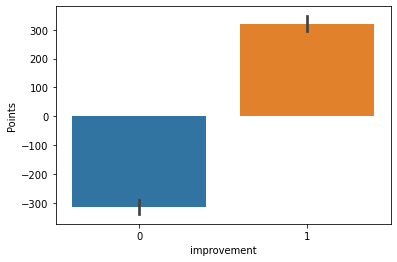

In [194]:
sns.barplot(x="improvement", y="Points", data=player_progression)

<AxesSubplot:xlabel='improvement', ylabel='Average Score'>

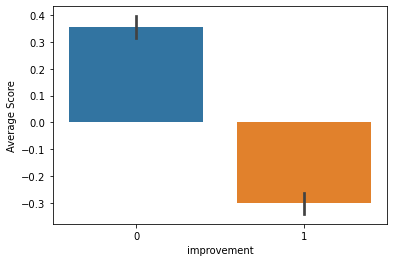

In [196]:
sns.barplot(x="improvement", y="Average Score", data=player_progression)

<AxesSubplot:xlabel='improvement', ylabel='Rounds'>

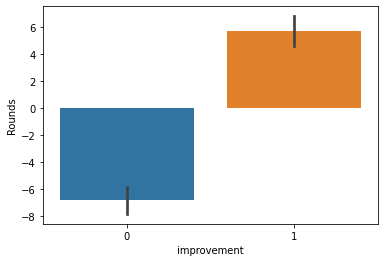

In [204]:
sns.barplot(x="improvement", y="Rounds", data=player_progression)

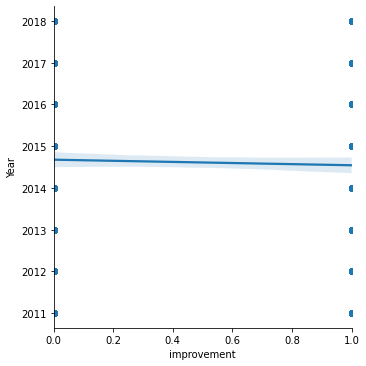

In [201]:

#Skatter plots of Price and View
sns.lmplot(x="improvement", y="Year", data=player_progression)

In [172]:
X_test_imputed1 = pd.DataFrame(imputer.transform(X_test1), columns=X1.columns)

In [173]:
X_test_scaled1 = pd.DataFrame(scaler.transform(X_test_imputed1[num_cols]), columns=num_cols)

In [174]:
test_preds = rf1.predict(X_test_scaled1)

In [175]:
accuracy_score(y_test1, test_preds )

0.7204301075268817

In [177]:
player_progression.corr()['improvement']

Rounds                0.421464
Fairway Percentage    0.105298
Year                 -0.029336
Avg Distance          0.128779
gir                   0.195394
Average Putts        -0.300237
Average Scrambling    0.265083
Average Score        -0.541818
Points                0.720181
Wins                  0.416852
Top 10                0.561736
Average SG Putts      0.309778
Average SG Total      0.517560
SG:OTT                0.262434
SG:APR                0.314102
SG:ARG                0.150586
Money                 0.618857
new_money             0.452052
new_points                 NaN
new_wins              0.423861
positive              1.000000
improvement           1.000000
Name: improvement, dtype: float64

In [97]:
# call modeling function
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg = modeling_function(logreg, X_train1, y_train1, X_val1, y_val1)

Training accuracy:  0.7780269058295964
Validation accuracy:  0.7974683544303798


In [109]:
X_train1

,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
240,-1.0,1.91,1.1,2.68,0.51,-8.00,0.335,-0.068,-0.881,-0.401,-0.268,-0.146
209,-4.0,1.38,4.8,-0.73,0.46,-3.38,0.424,-0.368,-0.594,0.106,0.080,-0.410
407,5.0,-1.51,-2.7,-7.58,-0.79,0.94,0.487,-0.248,-0.556,-0.001,-0.524,0.216
441,-11.0,-4.27,2.3,-4.13,-0.67,2.53,0.122,0.045,0.351,0.113,-0.150,0.342
850,4.0,2.25,-3.7,-0.75,0.85,-0.85,-0.036,-0.308,-0.169,0.118,0.088,-0.068
...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0.0,1.46,10.8,3.68,0.04,2.76,-1.431,-0.099,1.595,0.784,0.801,0.108
647,-11.0,4.12,2.1,5.40,-0.04,2.64,-1.008,0.172,1.174,0.460,0.332,0.211
17,19.0,0.61,3.7,2.99,0.35,1.97,-0.197,0.261,0.527,-0.043,0.082,0.268
941,0.0,1.37,1.7,-1.32,-0.23,-0.05,-0.117,-0.138,0.095,0.063,0.076,0.095


In [108]:
#testing on test data
X_test_imputed2 = pd.DataFrame(imputer.transform(X_test1), columns=X1.columns)
X_test_scaled2 = pd.DataFrame(scaler.transform(X_test_imputed2[num_cols]), columns=num_cols)
test_preds2 = logreg.predict(X_test_scaled2)
accuracy_score(y_test1, test_preds2 )

0.43010752688172044

Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money', 'new_money', 'new_points', 'new_wins', 'binned_points'],
      dtype='object')


IndexError: index 5 is out of bounds for axis 0 with size 5

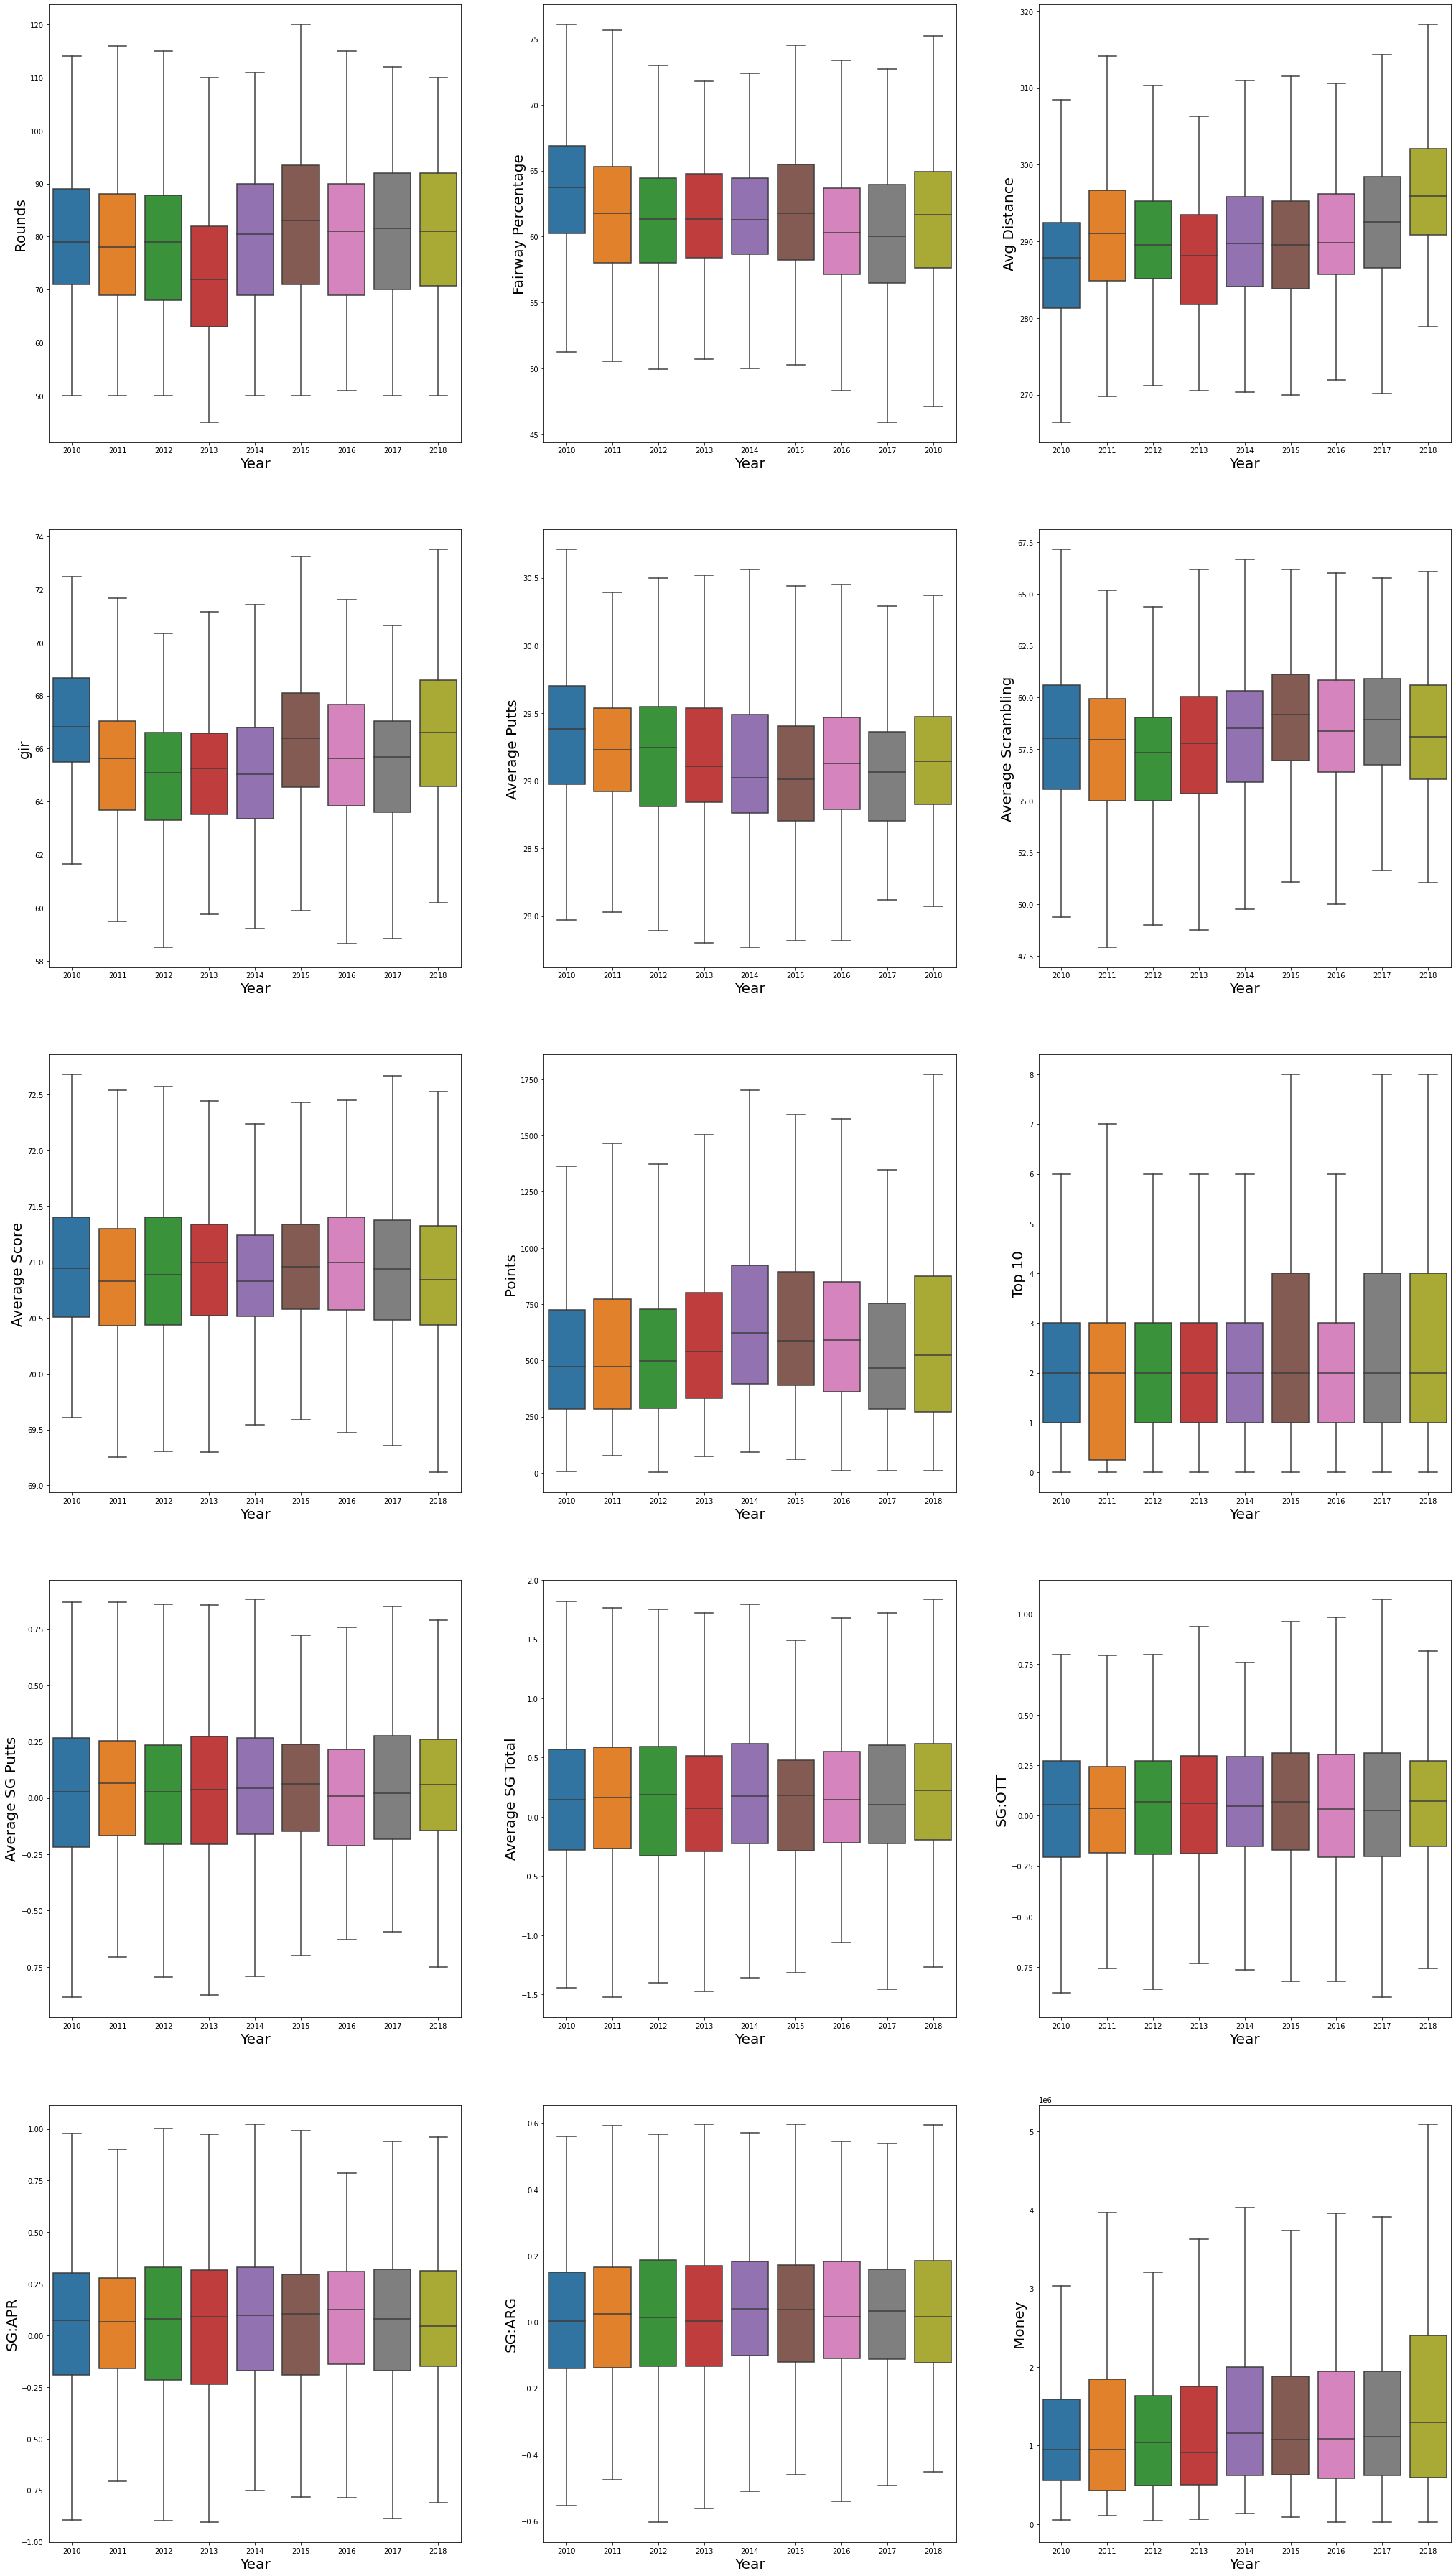

In [198]:
# Looking at the changes in statistics over time 
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = df.loc[:,(df.columns!='Player Name') & (df.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=df, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [113]:
import this